# 네이버 블로그 스크래핑

시작 url은 간단하면서 가장 필요한것으로 찾아 본다. 

In [1]:
url= 'https://search.naver.com/search.naver?where=blog&sm=tab_jum&query='

블로그들의 공통 적으로 나누어 지는 태그와 클래스를 찾아보면 아래와 같이 정리가 잘된 파트가 있다. 

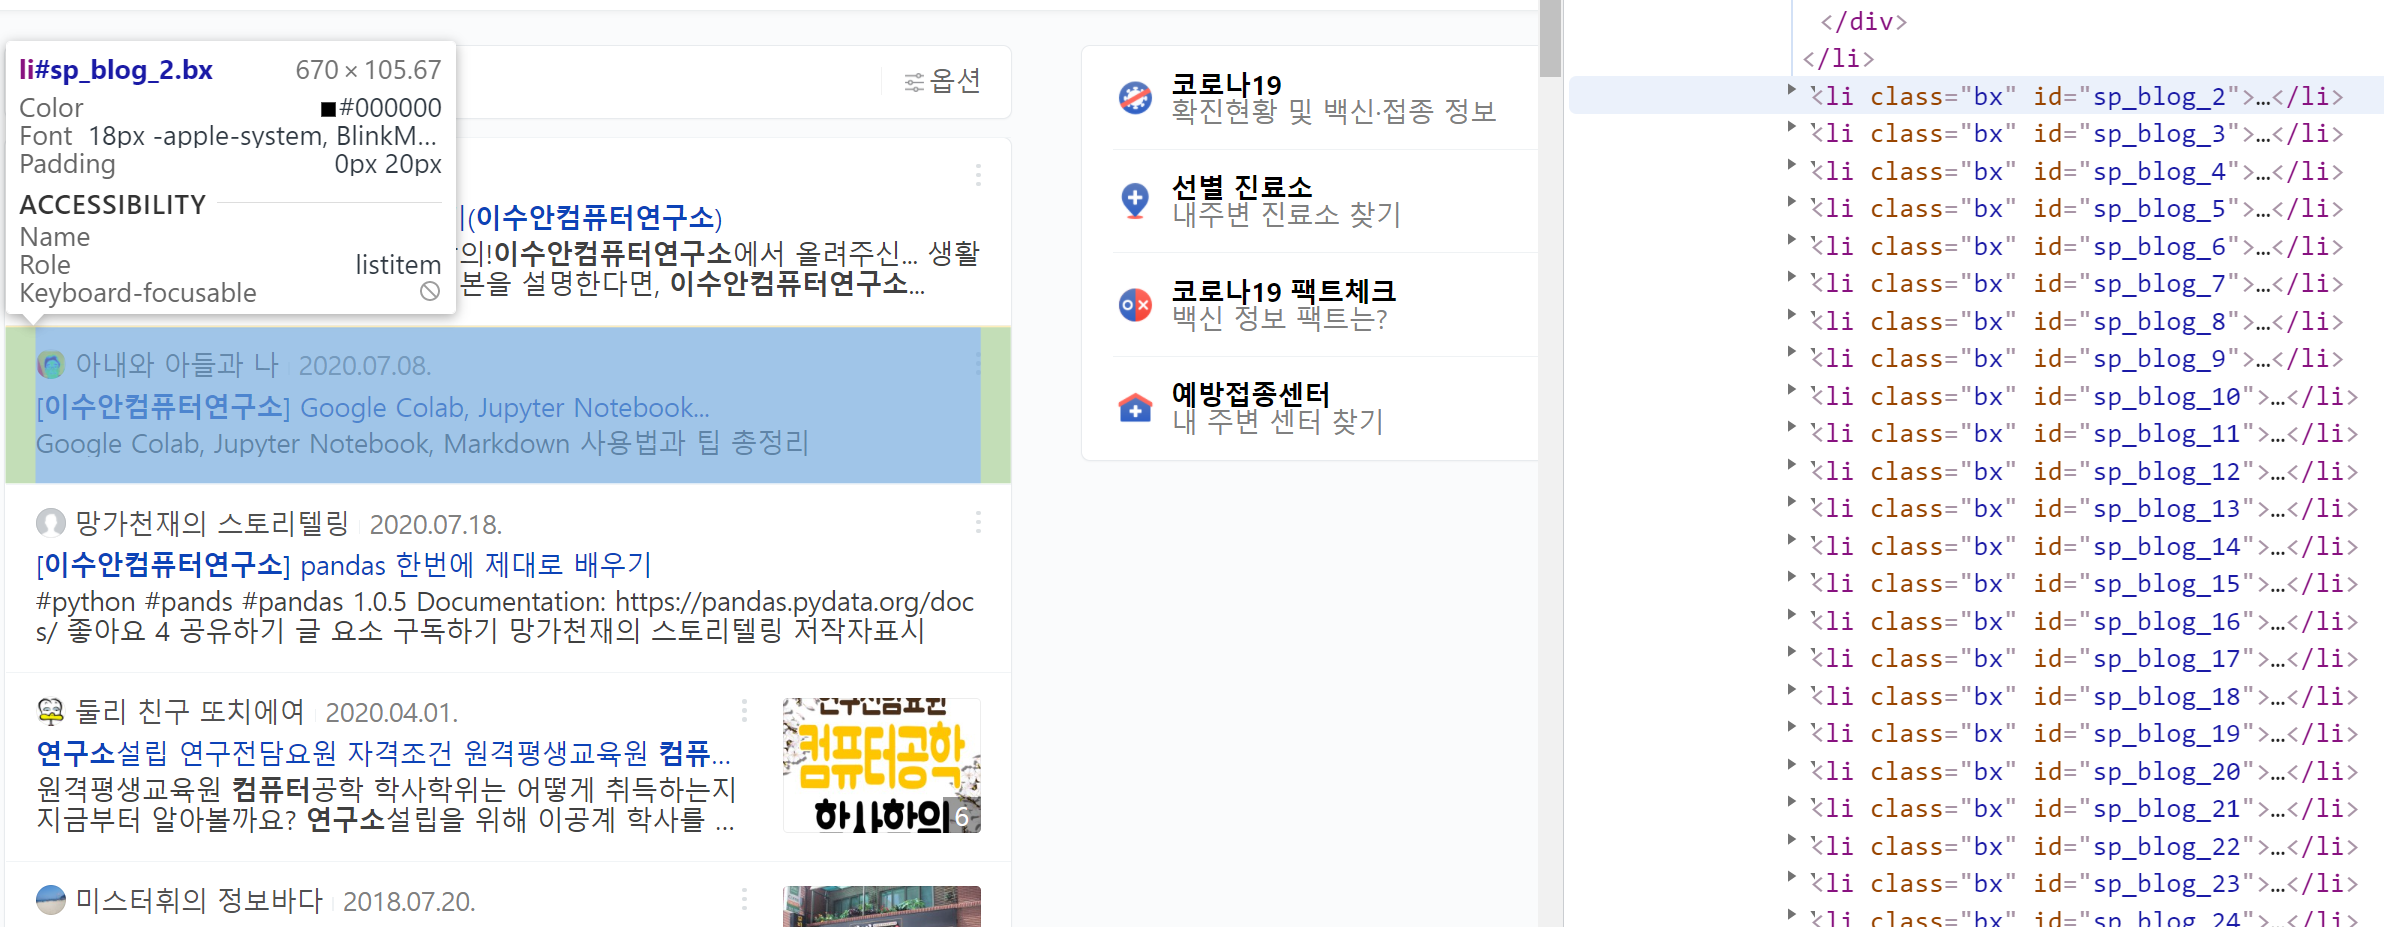

블로그의 개별 링크 안으로 들어 가보려 하지만, iframe 에 덛 씌워져 있어서 다시 한번 더 들어가보자~

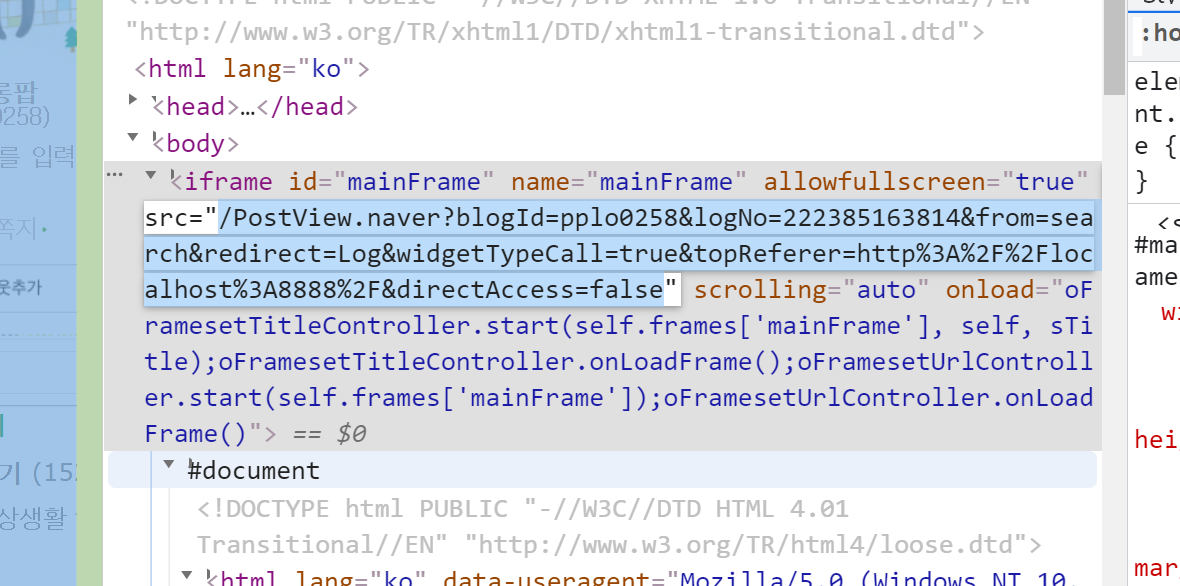

안에 들어가서 다시 한번~

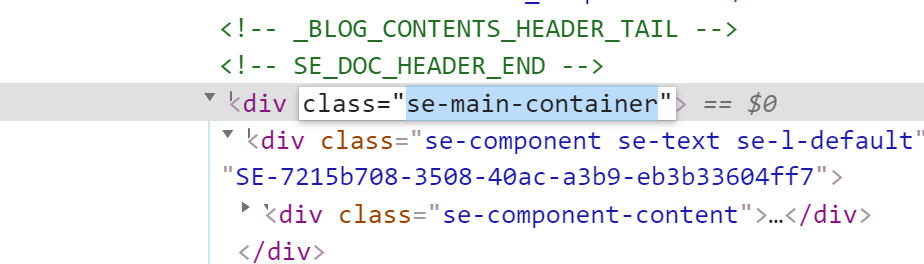

In [4]:
from bs4 import BeautifulSoup
import urllib.request
from urllib.parse import quote
import pandas as pd 



In [44]:
def get_posts(query, page_num=10):
    
    url_query = quote(query)
    url= 'https://search.naver.com/search.naver?where=blog&sm=tab_jum&query='+url_query
    idx = 0
    for _ in range(0, page_num):
        
        search_url = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(search_url, 'html.parser')
        posts = soup.find_all('div', {'class':'total_area'})
        
        post_df = pd.DataFrame(columns=('Title', 'Date', 'Blogger', 'Blog URL', 
                                        'Post URL', 'Contents'))
        
        
        
        for post in posts:
#             print(post)
            title = post.find('a', {'class':'api_txt_lines total_tit'}).get_text()
            date = post.find('span',{'class':'sub_time sub_txt'}).get_text()
            blogger = post.find('a', {'class':'sub_txt sub_name'}).get_text()
            post_url = post.find('a',{'class':'api_txt_lines total_tit'}).get('href')
            blog_url = post.find('a',{'class':'sub_txt sub_name'}).get('href')
#             print(title, date, blogger,blog_url, post_url)
            post_link = urllib.request.urlopen(post_url).read()
            post_html = BeautifulSoup(post_link, 'html.parser')
            
            for main_frame in post_html.select("iframe#mainFrame"):
                frame_url = "https://blog.naver.com" + main_frame.get('src')
                post_text = urllib.request.urlopen(frame_url).read()
                post_html_2 = BeautifulSoup(post_text, 'html.parser')
                post_content_text = ''
                
                for post_content in post_html_2.find_all('div', {'class':'se-main-container'}):
                    post_content_text = post_content.get_text()
                    post_content_text = post_content_text.replace('\n','')
                    post_content_text = post_content_text.replace('\t','')
                    
                post_df.loc[idx] = [title, date, blogger, blog_url, post_url, post_content_text]
                idx += 1
                
                print("#", end="")
        
        
        # 현재 블로그가 개편 되서, 페이지 방식이 아니라 스크린 다운 형태이다. 셀레니움이 필요하다~
        try:
            next_url = soup.find('a', {'class':'next'}).get('href')
            url = 'https://search.naver.com/search.naver' + next_url
            
        except:
            break
        
    
    return post_df
                
        
                
        
                
            
        

In [45]:
post_df = get_posts('인공지능', 3)

##############################

In [46]:
post_df

,Title,Date,Blogger,Blog URL,Post URL,Contents
0,써큘레이터 인공지능 활용법,2021.06.05.,끄적끄적 스케치,https://blog.naver.com/pplo0258,https://blog.naver.com/pplo0258?Redirect=Log&l...,올 여름은 작년보다 더 습하고 덥다는 기사를 접하게 되어 올 여름은 알차게 준비를 ...
1,AI 스피커 NUGU와 함께하는 SK텔레콤 ESG 인공지능 돌봄서비스,4일 전,경아신랑님인거죠~,https://blog.naver.com/feena74,https://blog.naver.com/feena74?Redirect=Log&lo...,이제는 인공지능 스피커 하나쯤 없는 집이 거의 없다고 생각될 만큼 보급이 많이 되...
2,"AI 스피커 누구 SKT 인공지능 돌봄 서비스, ESG 경영의 좋은 예",2021.06.18.,망상K의 비주얼스펙트럼 mangsangk.com,https://blog.naver.com/todshrck,https://blog.naver.com/todshrck?Redirect=Log&l...,​AI 스피커 누구(NUGU)에는 혼자 있을 때 도움 되는 기능이 몇 가지 있습니다...
3,"ai 인공지능 관련주 휴림로봇, 네패스, 알체라 주가 및 전망 분석",2021.03.08.,짠돌이부자스쿨,https://blog.naver.com/jamdoong,https://blog.naver.com/jamdoong?Redirect=Log&l...,AI 인공지능 관련주에 대해서 남겨보겠습니다. 4차 산업혁명의 핵심 기술은 여러 가...
4,"ai 인공지능 관련주 ai로봇 로보스타, 로보티즈, 휴림로봇...",2021.04.06.,고인돌마을 이장,https://blog.naver.com/japark6108,https://blog.naver.com/japark6108?Redirect=Log...,​​​지난 5일 뉴욕 증시에서는 전체적인 지수가 상승했습니다.​경기가 회복될 것이라...
5,쾌적한 숙소에 딱 스마트한 LG 휘센 인공지능 듀얼베인...,2일 전,셔터의 달인™ 뻔뻔하고 식상한 사진찍기,https://blog.naver.com/zenzang75,https://blog.naver.com/zenzang75?Redirect=Log&...,본격적인 여름 시즌이 시작되면서 습도까지 올라가고 있습니다. 해마다 겪는 여름은 항...
6,인공지능 전문가 : AI 교육 및 취업의 핵심은? (수학/코딩),2021.03.29.,비비디 바비디 부,https://blog.naver.com/ridesafe,https://blog.naver.com/ridesafe?Redirect=Log&l...,인공지능 전문가 : AI 교육 및 취업의 핵심은? (수학/코딩)​​ 선형대수.......
7,코엑스 전시회 월드 IT 쇼에서 만나본 SKT의 인공 지능과...,2021.04.22.,모이모이의 IT 이야기,https://blog.naver.com/moimoi1357,https://blog.naver.com/moimoi1357?Redirect=Log...,"SKT의 인공 지능과 메타버스가 적용된 AR, VR, MR 등 다양한 신기술들을 확..."
8,엘지 인공지능 통돌이세탁기 22kg 3개월 사용후기 넌 감동이야!,2일 전,홈유의 심플라이프,https://blog.naver.com/homageu,https://blog.naver.com/homageu?Redirect=Log&lo...,​가전제품은 구입 포스팅을 주로 올렸는데오래 사용해보고 후기를 쓰는 느낌도 새로운...
9,[SeTTA] 서울시 AI(인공지능) 산업 육성을 위한 생태계 분석...,6일 전,서울연구원 공식블로그 The Seoul Institute,https://blog.naver.com/seoulinst,https://blog.naver.com/seoulinst?Redirect=Log&...,
